# Lab 7: ODE Integrators and Predator Prey Modelling

# <span style="color:blue"> In this lab session, you will learn about:</span>
- ### solving differential equations numerically
- ### the odeint() function
- ### modeling the predator prey population dynamics using the Lotka-Volterra equations

# Brief Introduction to Differential Equations

In math, a differential equation is an equation that relates one or more functions and their derivatives. In applications, the functions generally represent physical quantities, the derivatives represent their rates of change, and the differential equation defines a relationship between the two. Such relations are everywhere, governing almost all aspects of the world around us including in disciplines such as engineering, physics, economics, biology and more. To find out more about differential equations, click [here](https://en.wikipedia.org/wiki/Differential_equation). 

The study of differential equations consists mainly of the study of their solutions (the set of functions that satisfy each equation) and of the properties of their solutions. These equations are represented in the form of the order of the degree, such as first order, second order, etc. 

Very often, completely different phenomena can share remarkably analogous behavior. For example, the viral spread of internet memes vs the spread of actual viruses can be described by similar differential equations using for instance the SIR model. 

## Ordinary Differential Equations (ODEs)

We shall focus only on solving ordinary differential equations. An ordinary differential equation (ODE) is an equation containing an unknown function of one real or complex variable $x$, its derivatives (for example, $\frac{dy}{dx}$), and some given functions of $x$. The unknown function is generally represented by a variable (often denoted $y$), which, therefore, depends on $x$. Thus $x$ is often called the independent variable of the equation. The term "ordinary" used in ordinary differential equation is in contrast with the term "partial" used in partial differential equation, which is typically with respect to more than one independent variable (for example, $\frac{\partial y}{\partial x}$ and $\frac{\partial y}{\partial t})$.

The **order** of a differential equation is given by the **highest derivative present**. $a_{n}(x),\, ..., \,a_{2}(x),\,a_{1}(x)$ and $a_{0}(x)$ are known as the arbitrary coefficients of the differential equation.

<div class = "alert alert-info">

- First-order: $a_{1}(x)\, \frac{dy}{dx} + a_{0}(x)\, y = f(x)$    


- Second-order: $a_{2}(x)\, \frac{d^{2}y}{dx^{2}} + a_{1}(x)\, \frac{dy}{dx} + a_{0}(x)\, y = f(x)$


- $n$-th-order: $a_{n}(x)\, \frac{d^{n}y}{dx^{n}} + a_{n-1}(x)\, \frac{d^{n-1}y}{dx^{n-1}} \, + \, ... +\, a_{0}(x)\, y = f(x)$
</div>
 
A few examples of ODEs:

   -  $\frac{dy}{dx}+y =0 $
   -  $\frac{dy}{dx}=\frac1{x} $
   -  $\frac{d^2y}{dx^2} + y = \sin x $
   -  $\frac{d^4y}{dx^4}+2 \frac{d^2y}{dx^2}+y = (x+1)^2 $
   

### Some notes on ODEs: ### 
- The above ODEs are all **linear** differential equations, which do not depend on $y^2, \left(\frac{dy}{dx}\right)^2$ etc.
-  The higher the order of the differential equation, the more arbitrary coefficients need to be added to the general solution.
An ODE of order $n$ consists of $(n+1)$ arbitrary coefficients.
- When $a_{n}(x),\, ..., \,a_{2}(x),\,a_{1}(x)$ and $a_{0}(x)$ are constants, we say that the differential equation has **constant coefficients**; otherwise, it has **variable coefficients**.
- When $f(x)$ = 0, we say that it is a **homogeneous** differential equation; otherwise, it is a **non-homogeneous** differential equation.

Although we can write down differential equations that are as complicated as we like, many practical problems in science and engineering can be approximately described by second-order differential equations of the form

$$a(x)\, \frac{d^{2}y}{dx^{2}} + b(x) \, \frac{dy}{dx} + c(x) \, y = f(x),$$

which describes various incarnations of harmonic or oscillatory behaviour.

The goal of solving an ODE is to determine what function or functions satisfy the equation. These solutions describe the state(s) of the systems that is(are) consistent with the governing differential equation, and are very useful in gaining insights into the model or simulation of phenomenon being studied.

## Numerical Solutions to Solving Differential Equations Using Python

The variety of differential equations that can be exactly solved by straightforward analytical methods is relatively restricted. Even if one were to resort to approximate series solutions, they may not always be satisfactory, either because of the slow convergence of the resulting series or because of the highly complicated manipulations from repeated stages of differentiation.  

If a differential equation and known boundary conditions are given, an approximate solution is often obtainable through the application of numerical methods. The particular relevant solution is obtained as a set of output values for the range of values of the independent variable. For instance, in an ODE involving $\frac{dy}{dx}$, the numerical solution is a set of function values $(y_0, y_1, y_2, ...,y_n$) corresponding to a set of points $(x_0, x_1, x_2, ..., x_n$) taken by the independent variable $x$. In other words, the numerical solution is basically a set of  points $((x_0,y_0),(x_1,y_1),(x_2,y_2) ..., (x_n,y_n))$ in the plot of $y$ versus $x$.        

Ordinary differential equations can be numerically solved in Python via the function **odeint** from the **scipy.integrate** submodule in the **scipy** module. We can load it using the statement:

    from scipy.integrate import odeint

### How to call odeint():

We must supply three arguments to **odeint**:

(a) the model expression $F(y,t)$ that specifies the ODE to be solved

(b) an array that defines the initial conditions and

(c) an array of values at which we would like **odeint** to evaluate the solutions $y(t)$. 

These three ingredients are what we need to solve an ODE in Python. In particular, the initial conditions are necessary for fixing the exact solution: for instance, an ODE system that describes an epidemic can only be completely solved if the initial conditions (data on the initial extent of infection) are known.

The general syntax for calling **odeint()** is 

    y = odeint(model, y0, t)

The variables in the expression are:

- <span style="color:blue">model</span> is a function name that returns derivative values at requested $y$ and $t$ values
- <span style="color:blue">y0</span> is an array representing the initial value(s) of <span style="color:blue">y</span>
- <span style="color:blue">t</span> is an array of $t$ values at which $y$ is to be computed. The first entry of this array is the time at which $y$ takes the initial value(s) of <span style="color:blue">y0</span>.
- <span style="color:blue">y</span> is an array of the values of $y(t)$ at the points specified in <span style="color:blue">t</span>.    

The **odeint()** function works by successively updating (integrating) the solution, one step at a time, according to the model specified. Schematically, this is how it works:

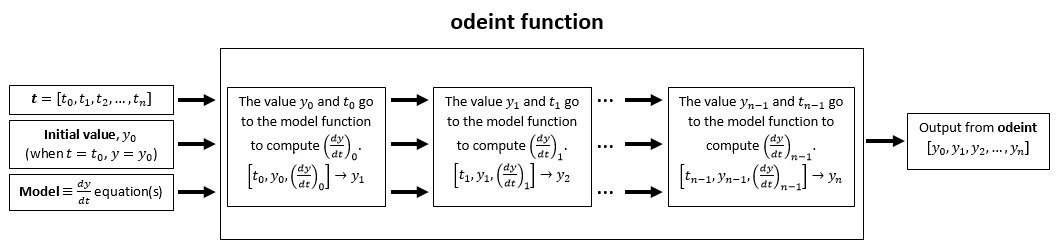

### Example 1:
We start by studying one of the simplest ODEs: 

$$ \frac{dy(t)}{dt} = - k\,y(t) $$ 

Physically, it represents a quantity that decays with a decay rate $k$. Since the decay amount is proportional to the value of $y(t)$, the decay is [exponential](https://www.mathsisfun.com/algebra/exponential-growth.html), and from math that there is an exact _closed-form_ solution given by

$$ y = y_0 \exp(-k\,t) $$


Setting $k = 0.3$ and the associated initial condition $y_{0} = 5.0$, solve the ODE using the **odeint()** function in Python and plot the result. Compare the error between the numerical odeint solution and the exact solution.

(50, 1)
[[5.        ]
 [4.42375528]
 [3.91392204]
 [3.46284668]
 [3.06375722]
 [2.7106624 ]
 [2.3982614 ]
 [2.12186437]
 [1.87732164]
 [1.6609623 ]
 [1.46953813]
 [1.30017539]
 [1.15033154]
 [1.01775702]
 [0.90046157]
 [0.79668431]
 [0.70486726]
 [0.62363203]
 [0.55175909]
 [0.48816942]
 [0.4319084 ]
 [0.3821314 ]
 [0.33809115]
 [0.29912649]
 [0.26465247]
 [0.23415155]
 [0.20716582]
 [0.18329018]
 [0.16216617]
 [0.14347669]
 [0.12694116]
 [0.11231132]
 [0.09936756]
 [0.08791555]
 [0.07778338]
 [0.06881893]
 [0.06088762]
 [0.05387038]
 [0.04766188]
 [0.0421689 ]
 [0.03730898]
 [0.03300916]
 [0.02920489]
 [0.02583905]
 [0.02286113]
 [0.02022641]
 [0.01789534]
 [0.01583292]
 [0.01400819]
 [0.01239376]]
(50,)
[5.         4.42375522 3.91392205 3.46284662 3.06375716 2.71066235
 2.39826134 2.12186423 1.87732159 1.66096224 1.46953807 1.30017535
 1.15033149 1.01775699 0.90046156 0.79668431 0.70486727 0.62363205
 0.55175911 0.48816945 0.43190843 0.38213143 0.33809119 0.29912653
 0.26465251 0.234

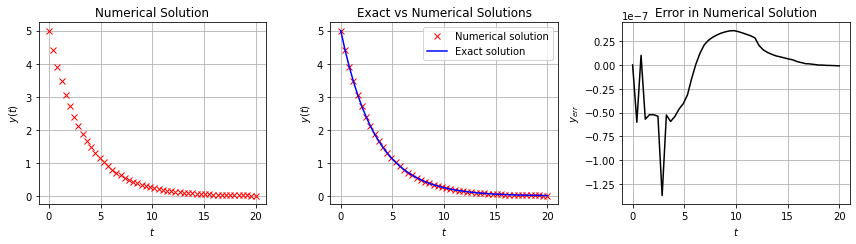

In [5]:
# Example 1A: Solving an ODE with the odeint function and comparing it with the exact solution

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint   # Imports odeint

# Global variable
k = 0.3   # k is accessible within the model function

# Define the function that returns dy/dt
def model(y,t):
    dydt = -k*y   # dydt is a variable name that defines the derivative
    return dydt   # Return the derivative in the form of a numpy array

y0 = 5.0                   # Initial condition i.e. y(t=0) = y0
t = np.linspace(0,20,50)   # Mesh for t: numpy array that holds 50 t values: [0, 20]

yns = odeint(model,y0,t)   # Call the odeint function; pass in model, y0 and t mesh
                           # odeint() will return the computed solution at the requested time values,
                           # i.e. a set of y values (solution) in the form of an array with shape(len(t),len(y0))
                           # The shape of a numpy array represents its dimensions. 
                           # Eg, the shape of the array [[1 2 3] [4 5 6]] is (2, 3), representing 2 rows and 3 columns
                           # So yns here has shape(50, 1) or 50 rows and 1 column
print(np.shape(yns))
print(yns)
    
# Plot results
plt.figure(figsize=(12,3.5))   # Declare overall figure size

# Plot numerical solution
plt.subplot(1,3,1)
plt.title("Numerical Solution")
plt.plot(t,yns,"rx")
plt.xlabel("$t$");plt.ylabel("$y(t)$")
plt.grid(True)

# Compare exact and numerical solutions
yes = 5.0*np.exp(-k*t)   # Exact closed-form solution   
print(np.shape(yes))
print(yes)
plt.subplot(1,3,2)
plt.title("Exact vs Numerical Solutions")
plt.plot(t,yns,"rx",label="Numerical solution")   # Numerical solution
plt.plot(t,yes,"b-",label="Exact solution")       # Exact solution
plt.xlabel("$t$");plt.ylabel("$y(t)$") 
plt.grid(True)
plt.legend()

# Error in the numerical solution
yns = yns[:,0]   # Converts column of data points to row of data points before performing subtraction
print(np.shape(yns))
print(yns)
ydiff = yes-yns   # Subtract numerical from exact solution to obtain error
                  # Note that it is extremely small in this case
plt.subplot(1,3,3)
plt.title("Error in Numerical Solution")
plt.plot(t,ydiff,"k-")
plt.xlabel("$t$");plt.ylabel("$y_{err}$")
plt.grid(True)

plt.tight_layout()
plt.show()

An optional fourth input known as **args** that allows additional information to be passed into the **model** function can be written in the **odeint** function call. The **args** input is a tuple sequence of values. The **model** function will have an additional parameter to receive the value of the **args** argument. 

In [3]:
# Example 1B: Including additional parameter in the odeint function 

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function that returns dy/dt; note that k is now an additioanl parameter that receives the input argument
def model(y,t,k):
    dydt = -k*y
    return dydt
  
y0 = 5.0                      
t = np.linspace(0,20,50) 
k = [0,0.1,0.2,0.3,0.4,0.5]   # List of k values to be used for solving the ODE
        
for x in k:   # Loop through all the values of k
    yns = odeint(model, y0, t, [x])    # Note the syntax for passing additional argument
    plt.plot(t,yns,"-",label=f"k = {x:.1f}")   # Plot the curve corresponding to each k, one at a time

plt.title("Numerical solution $y(t)$ for various $k$ values")        
plt.xlabel("$t$");plt.ylabel("$y(t)$")
plt.grid(True)
plt.legend()   # Label each solution curve by its k value
plt.show()

error: Extra arguments must be in a tuple.

### Example 2

It is possible to solve ODEs with more complicated forms, for example, one that is based on a [piecewise](https://www.mathsisfun.com/sets/functions-piecewise.html) function. Supposing

$$ 5\frac{dy(t)}{dt} = - y(t) + u(t) $$ 

with the associated initial condition $y(0) = 1.0$ and 

$$ u(t) =
\left\{
    \begin{array}{ll}
        0 & \mbox{if } 0 \le t \lt 10 \\
        2 & \mbox{if } t \ge 10
    \end{array}
\right. $$ 

Solve the ODE using the **odeint** function in Python and plot the result.

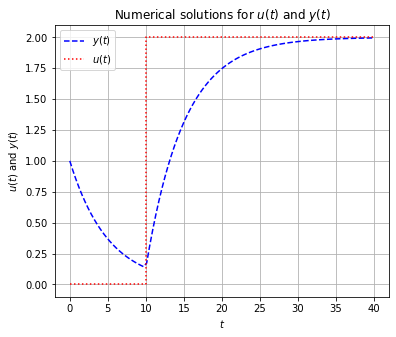

In [13]:
# Example 2: Solving an ODE with a piecewise function

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function that returns dy/dt
def model(y,t):
    u = 0.0
    if (t >= 10.0):
        u = 2.0
    dydt = (u - y)/5.0   # Rearrange the differential equation to obtain an expresssion for dy/dt
    return dydt

y0 = 1.0                    # Initial condition
t = np.linspace(0,40,100)   # t mesh

yns = odeint(model,y0,t)   # Solve the ODE; y0 is the initial value for y

# Plot results
plt.figure(figsize=(6,5))
plt.title("Numerical solutions for $u(t)$ and $y(t)$")
plt.plot(t,yns,"b--",label="$y(t)$")
plt.plot([0,10,10,40],[0,0,2,2],"r:",label="$u(t)$")   # Graph of u(t) consisting of: (0,0),(10,0),(10,2) & (40,2)
plt.xlabel("$t$");plt.ylabel("$u(t)$ and $y(t)$")
plt.grid(True);plt.legend()
plt.show()

### Example 3
The **odeint** function can also solve multiple simultaneous differential equations. Consider the pair of ODEs:

$$ \frac{dx(t)}{dt} = 3 \exp(-t) $$

$$ \frac{dy(t)}{dt} = 3 - y(t) $$

Solve for $x(t)$ and $y(t)$, and show that the solutions are equivalent if we set their corresponding initial conditions to be $x(0) = 0.0$ and $y(0) = 5.0$. 

(50, 2)
[[0.         5.        ]
 [1.67384235 3.88410509]
 [2.41376863 3.3908209 ]
 [2.74085491 3.17276338]
 [2.88544421 3.0763705 ]
 [2.94936027 3.03375978]
 [2.97761451 3.0149236 ]
 [2.99010437 3.00659702]
 [2.99562555 3.00291623]
 [2.99806619 3.00128913]
 [2.99914509 3.00056986]
 [2.99962203 3.00025191]
 [2.99983286 3.00011136]
 [2.99992605 3.00004923]
 [2.99996723 3.00002176]
 [2.99998544 3.00000962]
 [2.99999348 3.00000425]
 [2.99999704 3.00000188]
 [2.99999861 3.00000083]
 [2.99999931 3.00000037]
 [2.99999962 3.00000016]
 [2.99999975 3.00000007]
 [2.99999981 3.00000003]
 [2.99999984 3.00000001]
 [2.99999985 3.00000001]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999986 3.        ]
 [2.99999987 3.        ]
 [2.99999987 3.  

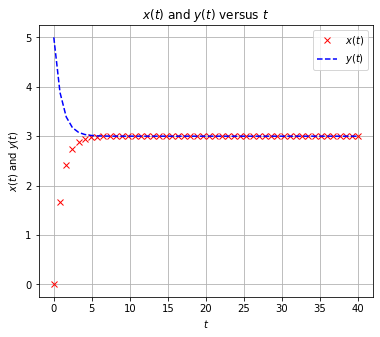

In [18]:
# Example 3: Solving simultaneous ODEs with the odeint function

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z[0],z[1]       # x and y are two variables that are assigned their respective initial values
    dxdt = 3*np.exp(-t)   
    dydt = 3 - y
    dzdt = [dxdt, dydt]   # dzdt is a list containing the computed dx/dt and dy/dt
    return dzdt

x0 = 0.0   # Initial x condition, try varying it       
y0 = 5.0   # Initial y condition, try varying it       

z0 = [x0,y0]   # Store x0 and y0 as a list to pass to odeint() 
t = np.linspace(0,40,50)   # t mesh

# Solve the ODE
zns = odeint(model,z0,t)   # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                           # odeint() will return the computed solutions at the requested time values,
                           # i.e. a set of x(t) values and a set of y(t) values (solutions) 
                           # in the form of an array with shape(len(t),len(z0))
                           # So zns here has shape(50, 2) or 50 rows and 2 columns
print(np.shape(zns))
print(zns)

xns = zns[:,0]   # Extract the first column of data which is the set of x(t) values or x solution 
yns = zns[:,1]   # Extract the second column of data which is the set of y(t) values or y solution

# Plot results
plt.figure(figsize=(6,5))
plt.title("$x(t)$ and $y(t)$ versus $t$")
plt.plot(t,xns,"rx",label="$x(t)$")
plt.plot(t,yns,"b--",label="$y(t)$")
plt.xlabel("$t$");plt.ylabel("$x(t)$ and $y(t)$")
plt.grid(True);plt.legend()
plt.show()

### Example 4

Let's consider a more complicated system of coupled ODEs, where each of the two dependent variables is not independent of each other anymore:

$$ 2 \frac{dx(t)}{dt} = - x(t)y(t) + u(t) $$

$$ 5 \frac{dy(t)}{dt} = - y(t) + x(t) $$

where $u(t) = 2 S(t - 5)$ and the step function $S$ is given by

$$ S(t - 5) =
\left\{
    \begin{array}{ll}
        0 & \mbox{if } 0 \le t \lt 5 \\
        1 & \mbox{if } t \ge 5
    \end{array}
\right. $$ 

Their corresponding initial conditions are given as $x(0) = 0.0$ and $y(0) = 1.0$. Solve for $x(t)$ and $y(t)$ and plot the results. 

(100, 2)
[[0.         1.        ]
 [0.         0.92237072]
 [0.         0.85076772]
 [0.         0.78472321]
 [0.         0.72380565]
 [0.         0.66761716]
 [0.         0.61579051]
 [0.         0.56798712]
 [0.         0.52389468]
 [0.         0.4832251 ]
 [0.         0.44571267]
 [0.         0.41111231]
 [0.         0.37919796]
 [0.24689031 0.35593752]
 [0.61951245 0.36230806]
 [0.96288815 0.3959868 ]
 [1.27102529 0.45236939]
 [1.53591928 0.52664722]
 [1.75014778 0.61377061]
 [1.90907951 0.70860328]
 [2.01226501 0.80620708]
 [2.06371904 0.90216983]
 [2.07113886 0.99288629]
 [2.04443103 1.07572622]
 [1.99406686 1.14906499]
 [1.92971156 1.21219261]
 [1.85936092 1.26514265]
 [1.78900203 1.30848845]
 [1.72267551 1.34314571]
 [1.66277226 1.37020544]
 [1.6104193  1.3908073 ]
 [1.56585676 1.40605282]
 [1.52875598 1.41695242]
 [1.49846245 1.42439847]
 [1.47416775 1.42915627]
 [1.4550228  1.43186678]
 [1.44020726 1.43305609]
 [1.42896796 1.43314825]
 [1.42063676 1.43247918]
 [1.41463564 1.4

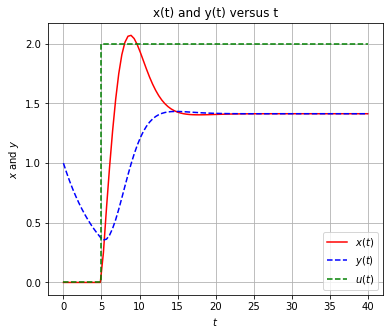

In [26]:
# Example 4: Using odeint to solve simultaneous coupled ODEs with piecewise dependence on t

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Function that returns dz/dt
def model(z,t):
    x, y = z[0],z[1]   # x and y are two variables that are assigned their respective initial values
    
    # Definition of function u, which was defined in a slightly convoluted manner
    if(t >= 5.0):                 
        u = 2.0
    else:
        u = 0.0
        
    dxdt = (u - x*y)/2.0         
    dydt = (x - y)/5.0 
    dzdt = [dxdt, dydt]   # dzdt is a list containing the computed dx/dt and dy/dt
    return dzdt
    
z0 = [0.0, 1.0]   # Initial condition z0 = [x0,y0]
t = np.linspace(0,40,100)   # t mesh

zns = odeint(model,z0,t)   # Call the ODE integrator
print(np.shape(zns))
print(zns)

# Plot results
plt.figure(figsize=(6,5))
plt.title("x(t) and y(t) versus t")
plt.plot(t,zns[:,0],"r-",label="$x(t)$")
plt.plot(t,zns[:,1],"b--",label="$y(t)$")
plt.plot([0,5,5,40],[0,0,2,2],"g--",label="$u(t)$") 
plt.xlabel("$t$"); plt.ylabel("$x$ and $y$")
plt.grid(True);plt.legend()
plt.show()

# Predator-Prey modeling - Lotka-Volterra equations

A well-known way to model the antagonist relationship between a predator and its prey is via the **Lotka-Volterra** equations. These equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. 

Consider for instance foxes (predator) and rabbits (prey). Let $x$ and $y$ represent rabbit and fox populations, respectively. Then 

$$\frac{dx}{dt} = x\,(a - b\,y)$$

$$\frac{dy}{dt} = y\,(d\,x-c)$$

$\frac{dx}{dt}$ and $\frac{dy}{dt}$ are the growth rates of the rabbit and fox populations respectively. $a$, $b$, $c$ and $d$ are parameters, which are assumed to be positive. $a$ and $c$ represent the natural population growth and death rates of the rabbits and foxes respectively, should one of them exist without the other. $b$ represents the rate at which rabbits are eaten by the foxes. $d$ represents the rate of fox population growth from feasting on the rabbits. In short:

- a: rate of natural increase of prey population
- b: rate of decrease of prey due to predation
- c: rate of natural decrease of predator population without prey
- d: rate of increase of predators due to predation

In general, such an ODE system describes the dynamics of antagonistic quantities, not necessarily restricted to ecological settings.

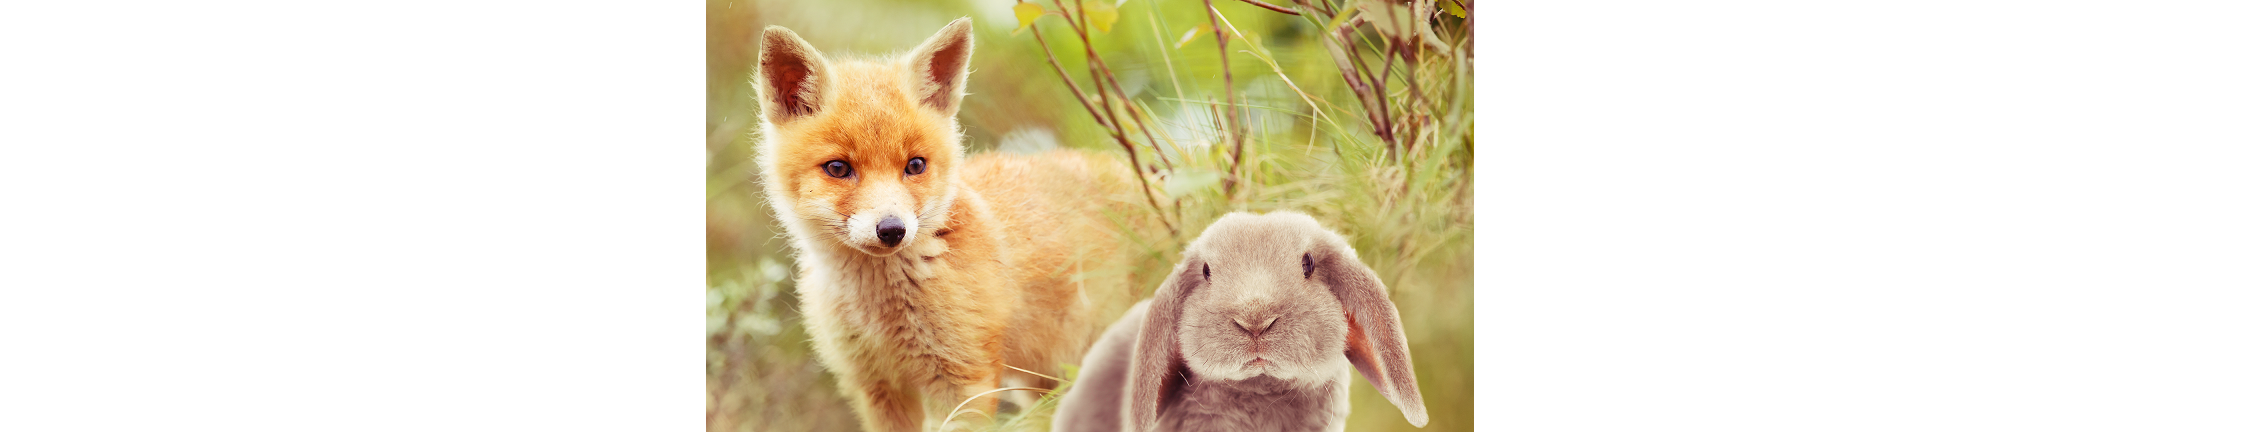

### Assumptions:

The Lotka-Volterra model (and also the discrete predator-prey
model discussed previously) makes a number of assumptions,
not necessarily realizable in nature, about the environment
and evolution of the predator and prey populations:
1. The prey population ﬁnds ample food at all times.
2. The food supply of the predator population depends
entirely on the size of the prey population.
3. The rate of change of population is proportional to its size.
4. During the process, the environment does not change in
favor of one species, and genetic adaptation is
inconsequential.
5. Predators have limitless appetite.

**Below: Hare and Lynx populations from pelt trading records (Odum, Fundamentals of Ecology, Saunders, 1953)**
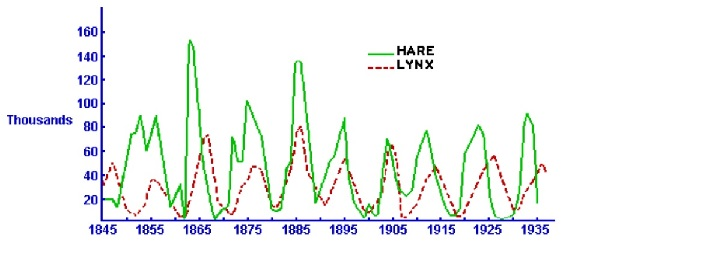

### Equilibrium:

For the population to stay at equilibrium (remain constant), we must have $\frac{dx}{dt}=0$ and $\frac{dy}{dt}=0$ when $a=by$ and $dx=c$, i.e. when

$$ (x,y)=(x_{eq},y_{eq})= \left(\frac{c}{d},\frac{a}{b}\right) $$

Otherwise, the populations will oscillate about the equilibrium. Think about why this is so. Is it possible for one population to remain constant while the other oscillates?


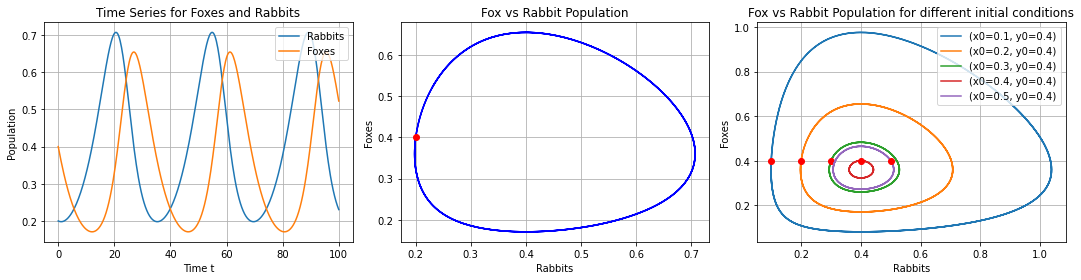

In [80]:
# Example 5A: Modeling population dynamics via the Lotka-Volterra equation; populations are normalised

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Declare the system parameters
a,b,c,d = 0.18,0.5,0.2,0.5   # Try [0.3,0.0,0.2,0.0], [0.18,.0.5,0.2,0.5]; remember 0<a<= b; 0<c<=d

# Define the function that returns dx/dt and dy/dt together as dz/dt
def model(z,t):
    x,y = z[0],z[1]
    dxdt = x*(a - b*y)   # Implementation of L-V equation
    dydt = y*(d*x - c)   # Implementation of L-V equation
    dzdt = [dxdt,dydt]
    return dzdt
    #return [z[0]*(a - b*z[1]), z[1]*(d*z[0] - c)]
    
x0,y0 = 0.2,0.4   # Initial populations of rabbit and fox respectively; try [0.4,0.36] equilibrium populations
z0 = [x0,y0]   
t = np.linspace(0,100,400)   # Time mesh
zns = odeint(model,z0,t)     # Call the odeint function; pass in model, z0 or [x0,y0] and t mesh
                             # odeint() will return the computed solutions at the requested time values,
                             # i.e. a set of x(t) values and a set of y(t) values (solutions) 
# Set figure size
plt.figure(1,(15,4))

# Plot time series for foxes and rabbits
plt.subplot(1,3,1)
plt.title("Time Series for Foxes and Rabbits")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

# Plot phase portrait (y(t) vs x(t))
plt.subplot(1,3,2)
plt.title("Fox vs Rabbit Population")
plt.plot(zns[:,0],zns[:,1],"b-")
plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True)

# Plot phase portraits for different initial number of rabbits x0
plt.subplot(1,3,3)
x0list = [0.1,0.2,0.3,0.4,0.5]   # List of different initial rabbit population to plot
y0 = 0.4
for x0 in x0list:
    z0 = [x0,y0]
    zns = odeint(model,z0,t)
    mylabel = "(x0=" + str(x0) + ", y0=" + str(y0) + ")"
    plt.plot(zns[:,0],zns[:,1],"-",label=mylabel)
    plt.plot(z0[0],z0[1],'ro')   # Indicates initial starting point or initial populations
    
plt.title("Fox vs Rabbit Population for different initial conditions")
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()

As we can see, the fox and rabbit populations generally oscillate cyclically, approximately a quarter of a period out of phase i.e. when rabbits thrive, foxes multiply. Then the rabbits get eaten up more, and their population dwindles. Foxes in turn go hungry, and also start to die off. A reduced number of foxes allows the rabbits to thrive again, and the cycle repeats....

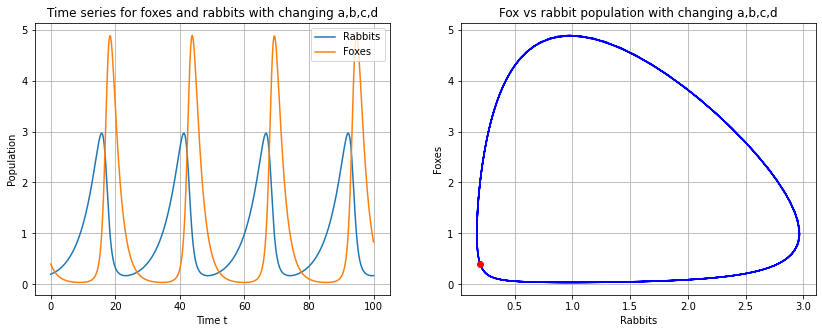

In [79]:
# Example 5B: Lotka-Volterra solutions - Comparison between population evolutions with different sets of parameters
# Non-normalised populations may result which should not affect interpretation of results

# Function that returns dz/dt
def model(z,t):
    x,y = z[0],z[1]      # x - prey; y - predator
    dxdt = x*(a - b*y)   # Implementation of L-V equations
    dydt = y*(d*x - c)   # Implementation of L-V equations
    dzdt = [dxdt,dydt]
    return dzdt
    
x0, y0 = 0.2,0.4   # Initial conditions
t = np.linspace(0,100,400)   # Time mesh

a,b,c,d = 0.2,0.2,0.5,0.51   # Remember 0<a<= b; 0<c<=d 
                             # Try [0.2,0.8,0.2,0.2],[0.2,0.2,0.2,0.8],[0.5,0.8,0.5,0.8],[0.2,0.2,0.5,0.51]
                               
zns = odeint(model,[x0, y0],t)   # Solve ODE

# Set figure size
plt.figure(1,(14,5))

# Plot time series for foxes and rabbits
plt.subplot(1,2,1)
plt.title(f"Time series for foxes and rabbits with changing a,b,c,d")
plt.plot(t,zns[:,0],"-",label = "Rabbits")
plt.plot(t,zns[:,1],"-",label = "Foxes")
plt.ylabel("Population"); plt.xlabel("Time t")
plt.grid(True); plt.legend(loc=1)

# Plot phase portrait (y(t) vs x(t))
plt.subplot(1,2,2)
plt.title(f"Fox vs rabbit population with changing a,b,c,d")
plt.plot(zns[:,0],zns[:,1],"b-")
plt.plot(x0,y0,'ro')   # Indicates initial starting point or initial populations
plt.ylabel("Foxes"); plt.xlabel("Rabbits")
plt.grid(True)
  
plt.show()

### Questions to ponder:
- What is the implication of high b and low d?
- What is the implication of low b and high d?
- What is the implication of both b and d being high?
- How does having a high c affect the evolution of the populations?

## Some observations of the Lotka-Volterra equation model

- Antagonistic relation between prey and predator populations causes their populations to oscillate. 
- Oscillations are typically out of sync - prey population increases first before the predator population increases, etc.
- Oscillations are inevitable unless the initial population lies at the equilibrium.

## Further Practice

### Question 1:
With reference to Example 1B, modify the program such that different initial values $y0 = [0,0.1,0.2,0.3,0.4,0.5]$ are passed into the odeint function to plot the corresponding graph.

### Question 2:
Solve the following ODE with **odeint()** for the initial condition $y(0)=2$, and plot $y(t)$ against $t$ (with appropriate labels):

$$ \frac{dy(t)}{dt} + y(t) = y(t)\cos t $$ 

Use the following code when creating the t mesh:

t = np.linspace(0,10,100)

where np is the alias for the numpy module.


## References:

1. Part of the code in this lab is taken from (credit due) [APMonitor](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations)
2. [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) 
3. [Lotka-Volterra equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)
4. [Lotka-Volterra equations using Scientific Python](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html)
5. An example by a PhD student [Solving ODE in Python](https://towardsdatascience.com/ordinal-differential-equation-ode-in-python-8dc1de21323b)